<a href="https://colab.research.google.com/github/gowthamich35/Crop_recommendation/blob/main/Crop_Recommendation_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
crop = pd.read_csv('Crop_recommendation.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


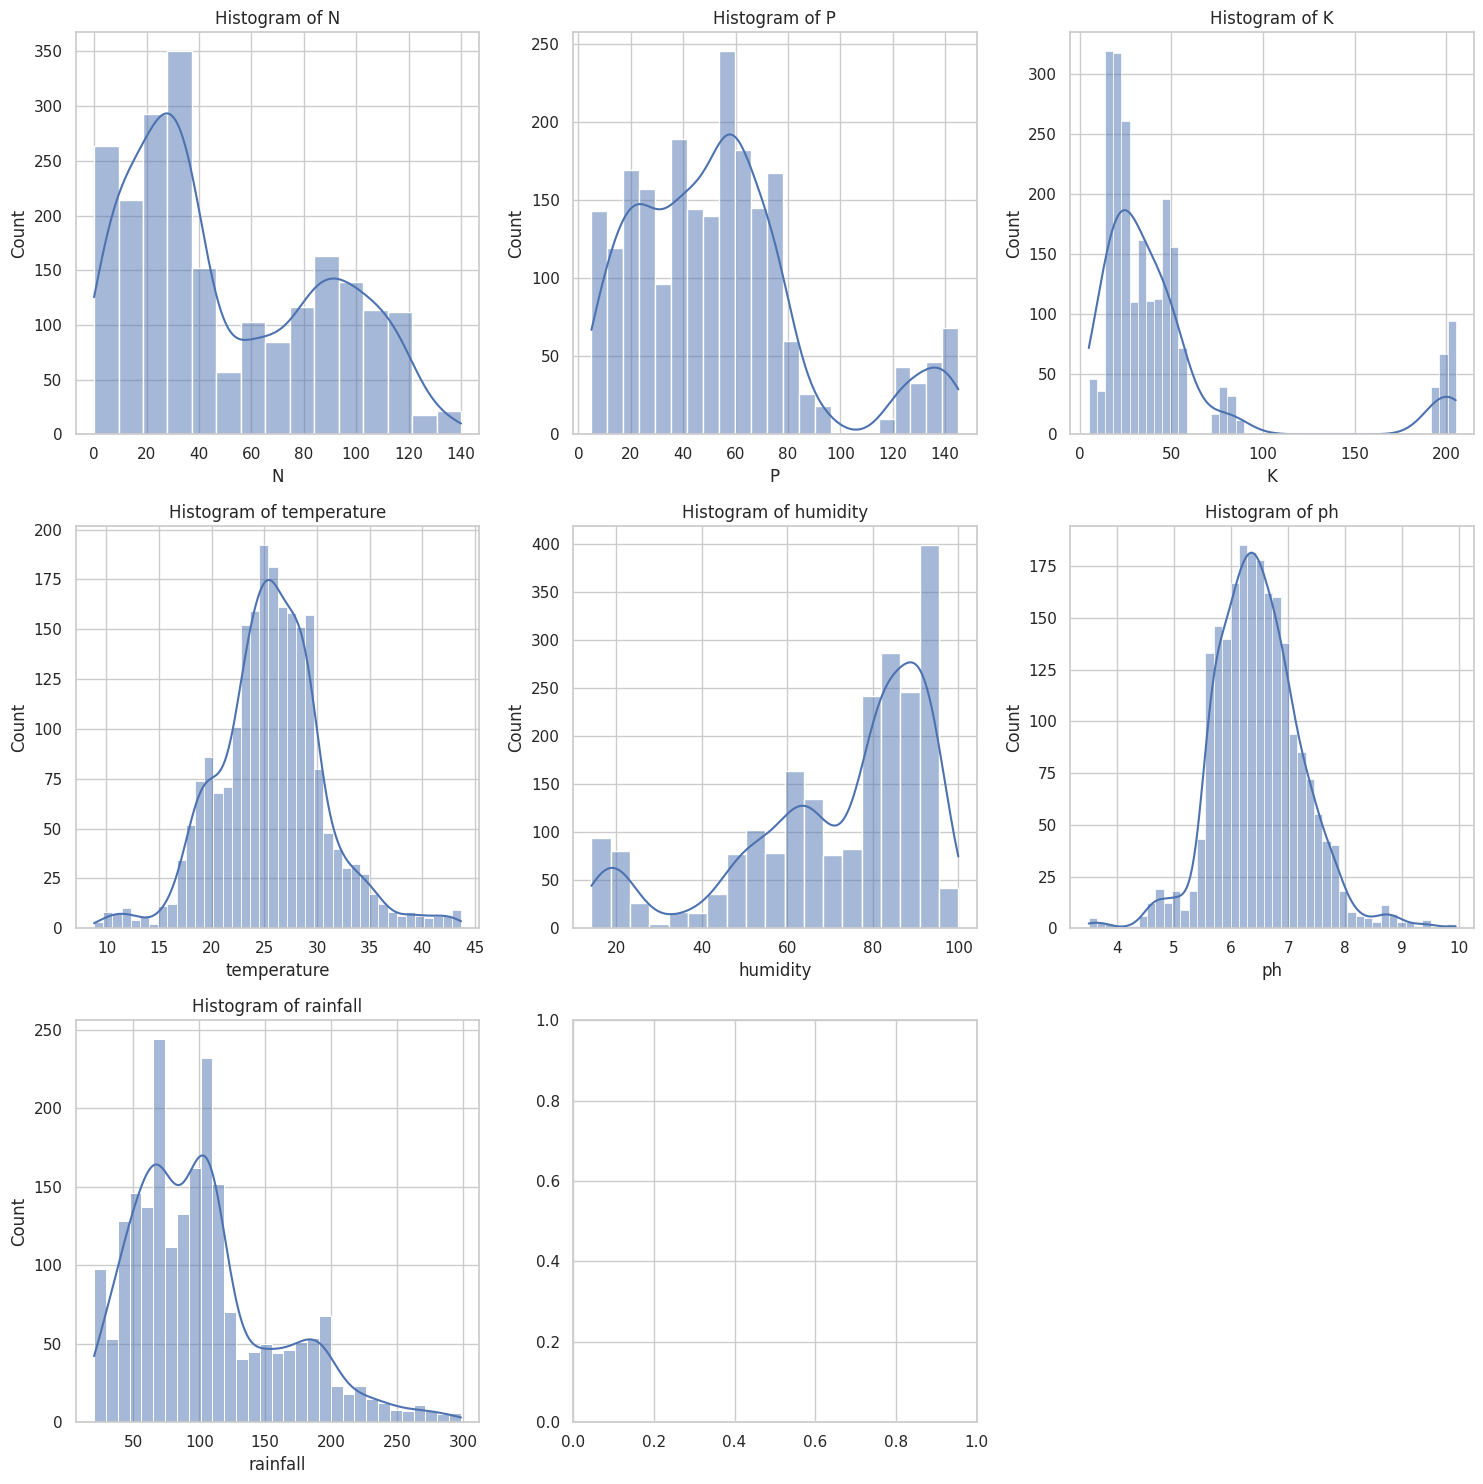

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# Plot histograms
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(crop[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature}')

# Hide the last empty subplot
axes[2, 2].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

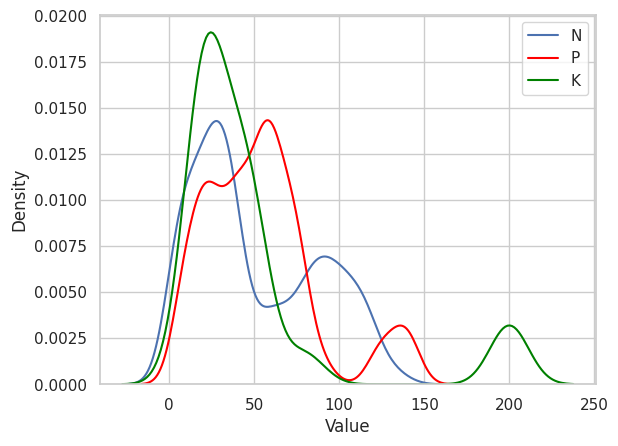

In [ ]:
sns.kdeplot(crop['N'], label='N')
sns.kdeplot(crop['P'], label='P', color='red')
sns.kdeplot(crop['K'], label='K', color='green')
plt.xlabel('Value')
plt.legend()
plt.show()

## Encoding

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [ ]:
crop.drop('label', axis=1, inplace = True)

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [ ]:
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
crop_num,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

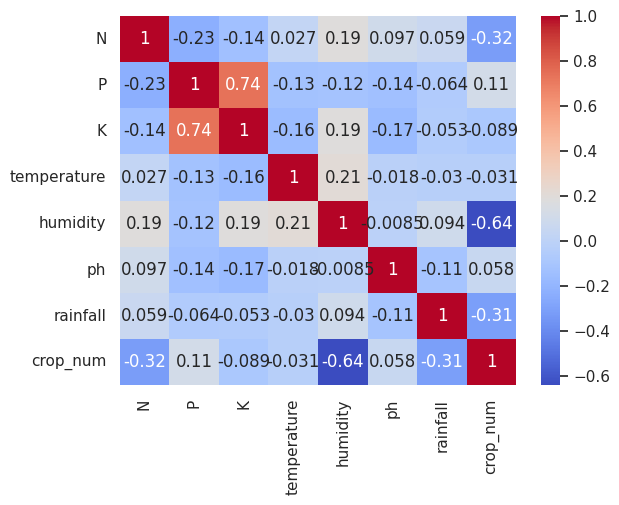

In [ ]:
corr = crop.corr()
sns.heatmap(corr, annot=True, cbar = True, cmap='coolwarm')

## Train Test Split

In [ ]:
X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [ ]:
X.shape

(2200, 7)

In [ ]:
y.shape

(2200,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape

(440, 7)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [ ]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

## Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

## Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)

    print(f" {name} Accuracy : {accuracy_score(y_test, y_pred)}")

 Logistic Regression Accuracy : 0.9204545454545454
 Naive Bayes Accuracy : 0.9954545454545455
 Support Vector Machine Accuracy : 0.9681818181818181
 K-Nearest Neighbors Accuracy : 0.9704545454545455
 Decision Tree Accuracy : 0.9863636363636363
 Random Forest Accuracy : 0.9931818181818182
 Bagging Accuracy : 0.9886363636363636
 AdaBoost Accuracy : 0.1409090909090909
 Gradient Boosting Accuracy : 0.9818181818181818
 Extra Trees Accuracy : 0.9090909090909091


Random Forest giving higgest accuracy

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.990909090909091

## Predictive System

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    prediction = rfc.predict(features).reshape(1, -1)

    return prediction[0]

In [ ]:
93# Function to get a12 valid integer input
def get_int_input(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Invalid input. Please enter an integer value.")

# Function to get a valid float input
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Get inputs from the user
N = get_int_input("Enter Nitrogen Amount: ")
P = get_int_input("Enter Phosphorous Amount: ")
k = get_int_input("Enter Potassium Amount: ")
temperature = get_float_input("Enter Temperature: ")
humidity = get_float_input("Enter Humidity: ")
ph = get_float_input("Enter pH: ")
rainfall = get_float_input("Enter Rainfall: ")

# Assuming recommendation function exists and returns a list with crop recommendation index
predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)

crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}

if predict[0] in crop_dict:
    crop1 = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop1))
else:
    print("Sorry, not able to recommend a proper crop for this environment")


Enter Nitrogen Amount: 34
Enter Phosphorous Amount: 56
Enter Potassium Amount: 78
Enter Temperature: 0
Enter Humidity: 12
Enter pH: 4
Enter Rainfall: 90
Apple is a best crop to be cultivated 


In [ ]:
import pickle
pickle.dump(rfc, open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

**PCA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X)
X = ms.transform(X)

In [ ]:
cr = crop.drop('crop_num', axis=1)
cr

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
print(X)

[[0.64285714 0.26428571 0.19       ... 0.79026683 0.46626364 0.65645778]
 [0.60714286 0.37857143 0.18       ... 0.77063285 0.54948026 0.74167459]
 [0.42857143 0.35714286 0.195      ... 0.79397664 0.67421877 0.87571039]
 ...
 [0.84285714 0.2        0.125      ... 0.61788046 0.44443315 0.55007079]
 [0.83571429 0.19285714 0.145      ... 0.44175991 0.50604494 0.38428046]
 [0.74285714 0.09285714 0.125      ... 0.53822177 0.50931694 0.43372112]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)

PCA(n_components=0.95)

In [ ]:
PC = pca.fit_transform(X)
print(PC)

[[-0.19580294 -0.25441839 -0.11089588  0.34397315  0.1157033   0.02419489]
 [-0.12909082 -0.23148923 -0.11332337  0.42468961  0.05937986  0.1441177 ]
 [-0.08551725 -0.17567165  0.05418406  0.53412098  0.05556889  0.27108104]
 ...
 [-0.34660485 -0.19552258 -0.32659951  0.24716707  0.01570441 -0.03651742]
 [-0.32465704 -0.0487045  -0.42569275  0.0912064  -0.03236525 -0.01775705]
 [-0.36730765 -0.06405917 -0.28142813  0.13058462  0.07805966 -0.02276357]]


In [ ]:
PC.shape

(2200, 6)

In [ ]:
var = pca.explained_variance_ratio_
var

array([0.3386283 , 0.24907209, 0.16044848, 0.11654863, 0.06033953,
       0.04192476])

In [ ]:
cumulative_variance_ratio = np.cumsum(np.round(var,decimals = 4)*100)
cumulative_variance_ratio

array([33.86, 58.77, 74.81, 86.46, 92.49, 96.68])

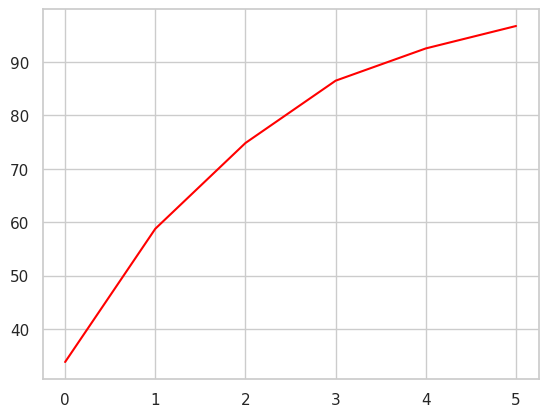

In [ ]:
# Variance plot for PCA components obtained
plt.plot(cumulative_variance_ratio,color="red")

In [ ]:
print("Standard deviations (eigenvalues of the covariance matrix):")
print(pca.explained_variance_)
print("\nProportion of Variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative Proportion:")
print(cumulative_variance_ratio)

Standard deviations (eigenvalues of the covariance matrix):
[0.11215848 0.0824962  0.0531428  0.03860255 0.01998531 0.01388607]

Proportion of Variance:
[0.3386283  0.24907209 0.16044848 0.11654863 0.06033953 0.04192476]

Cumulative Proportion:
[33.86 58.77 74.81 86.46 92.49 96.68]


<function matplotlib.pyplot.show(close=None, block=None)>

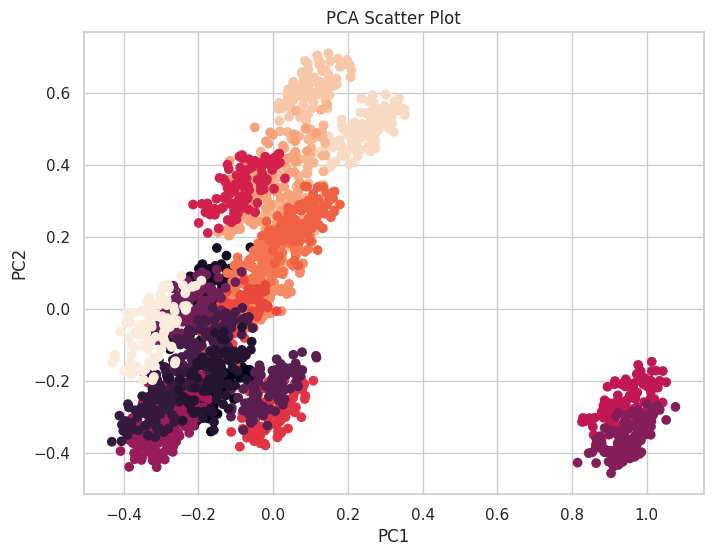

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(PC[:, 0], PC[:, 1], c=crop['crop_num'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show

Index 7 is out of bounds for pca.components_


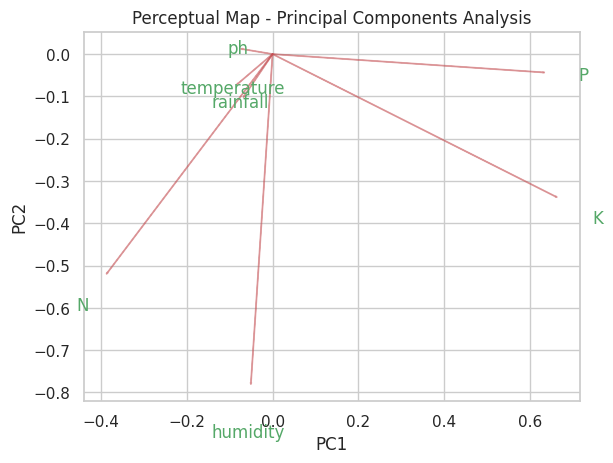

In [ ]:
for i, var in enumerate(crop.columns):
    # Check if i is within the bounds of pca.components_
    if i < pca.components_.shape[1]:
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
        plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, var, color='g', ha='center', va='center')
    else:
        # Handle the case where i is out of bounds (though this case should ideally not happen)
        print(f"Index {i} is out of bounds for pca.components_")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map - Principal Components Analysis')
plt.grid(True)
plt.show()

In [ ]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6']
pf = pd.DataFrame(data = PC, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.195803,-0.254418,-0.110896,0.343973,0.115703,0.024195
1,-0.129091,-0.231489,-0.113323,0.424690,0.059380,0.144118
2,-0.085517,-0.175672,0.054184,0.534121,0.055569,0.271081
3,-0.219770,-0.195943,0.017438,0.457211,-0.014005,0.094442
4,-0.190518,-0.222437,-0.035577,0.537509,0.146208,0.210950
...,...,...,...,...,...,...
2195,-0.316485,-0.157343,-0.262969,0.248636,-0.043889,0.026054
2196,-0.372957,-0.009873,-0.254131,0.088447,-0.028869,-0.135114
2197,-0.346605,-0.195523,-0.326600,0.247167,0.015704,-0.036517
2198,-0.324657,-0.048704,-0.425693,0.091206,-0.032365,-0.017757


In [ ]:
pf[['pc1','pc2','pc3','pc4','pc5','pc6']].std()

pc1    0.334901
pc2    0.287222
pc3    0.230527
pc4    0.196475
pc5    0.141369
pc6    0.117839
dtype: float64

In [ ]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] =cr.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
N,-0.385218,-0.516748,-0.760724,-0.003280,-0.067515,-0.032769
P,0.630624,-0.043230,-0.263260,0.063736,-0.314342,0.294052
K,0.660010,-0.336700,-0.124015,-0.000239,0.160561,-0.186867
temperature,-0.080748,-0.069795,0.164694,-0.114061,-0.920159,-0.014968
humidity,-0.050400,-0.776533,0.547242,-0.116906,0.085333,0.089665
ph,-0.070143,0.011854,-0.028664,-0.113061,0.113201,0.927305
rainfall,-0.065780,-0.098592,0.095884,0.977991,-0.063731,0.096855


In [ ]:
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(PC, y, test_size = 0.2, random_state = 42)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pc, y_train_pc)
y_pred_pc = rfc.predict(X_test_pc)
accuracy_score(y_test_pc, y_pred_pc)

0.9681818181818181

So from above result No need of PCA.

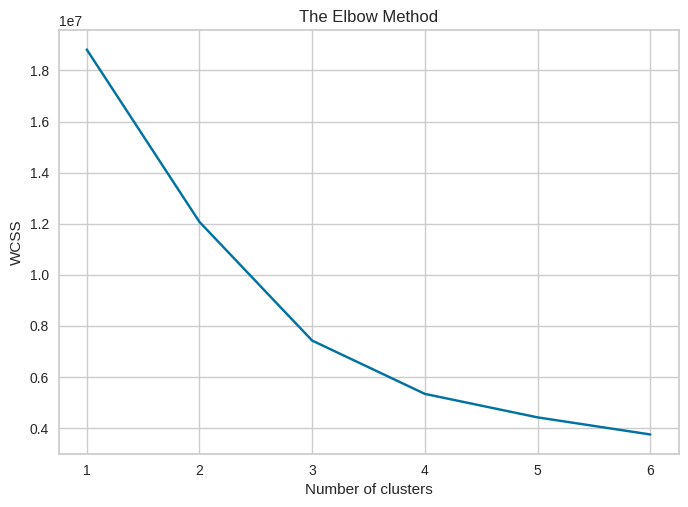

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
wcss = []
for i in range(1,7):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(cr)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

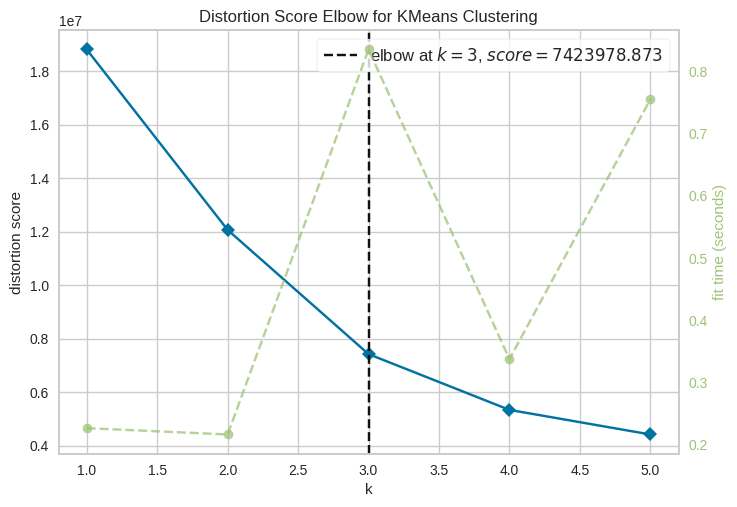

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,6))
visualizer.fit(cr)
visualizer.show()

**Elbow appears at k=3**

In [ ]:
pca = PCA(n_components=6)
principal_components = pca.fit_transform(cr)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-59.969729,84.055388,32.450240,1.031939,1.781662,-4.541438
1,-64.090628,107.779037,24.381552,11.177477,-8.363917,-3.876079
2,-75.156888,142.468675,-0.556024,1.930587,-6.069917,-2.545902
3,-80.247626,117.340628,13.940485,-3.881560,6.469536,1.390187
4,-85.084925,137.343003,16.712434,0.478325,2.652049,-5.011616


In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(cr)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,cluster
0,-59.969729,84.055388,32.450240,1.031939,1.781662,-4.541438,0
1,-64.090628,107.779037,24.381552,11.177477,-8.363917,-3.876079,0
2,-75.156888,142.468675,-0.556024,1.930587,-6.069917,-2.545902,0
3,-80.247626,117.340628,13.940485,-3.881560,6.469536,1.390187,0
4,-85.084925,137.343003,16.712434,0.478325,2.652049,-5.011616,0


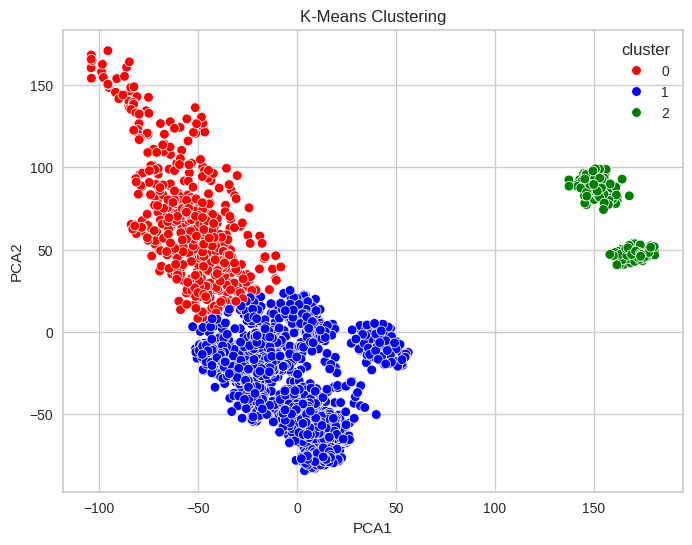

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','blue','green','pink','yellow'])
plt.title('K-Means Clustering')
plt.show()

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(cr)
pca_df_kmeans1= pd.concat([cr,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1.head()

,N,P,K,temperature,humidity,ph,rainfall,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,2


In [ ]:
pca_df_kmeans1.tail()

,N,P,K,temperature,humidity,ph,rainfall,cluster
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,2
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,2
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,2


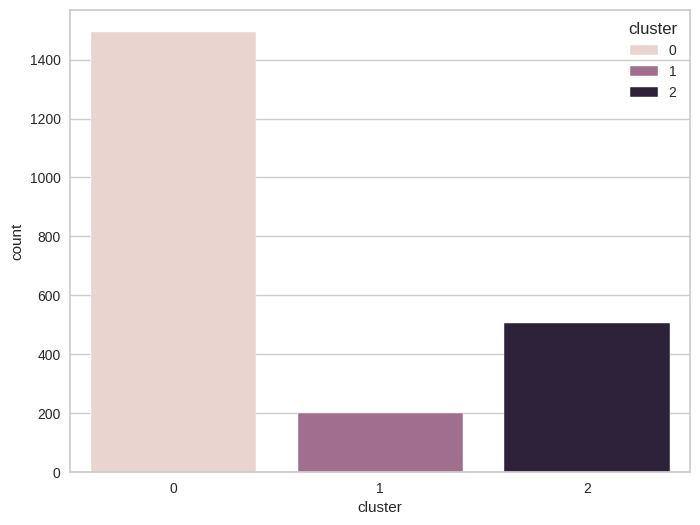

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=pca_df_kmeans1, hue='cluster')
plt.show()

In [ ]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

cluster
0    67.954545
2    22.954545
1     9.090909
Name: proportion, dtype: float64

In [ ]:
cluster1_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==0]
cluster1_analysis.head()

,N,P,K,temperature,humidity,ph,rainfall,cluster
100,71,54,16,22.613600,63.690706,5.749914,87.759539,0
101,61,44,17,26.100184,71.574769,6.931757,102.266244,0
102,80,43,16,23.558821,71.593514,6.657965,66.719955,0
103,73,58,21,19.972160,57.682729,6.596061,60.651715,0
104,61,38,20,18.478913,62.695039,5.970458,65.438354,0


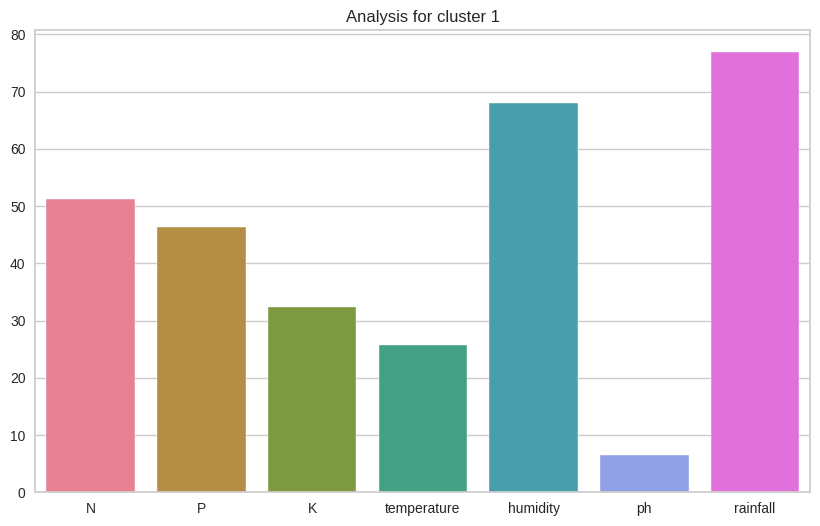

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=cluster1_analysis[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()

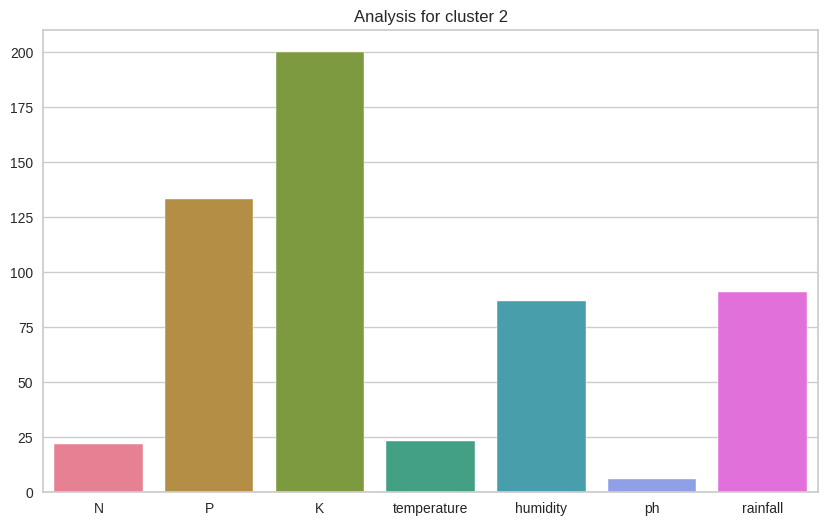

In [ ]:
cluster2_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==1]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster2_analysis[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],ci = None)
plt.title('Analysis for cluster 2')
plt.show()

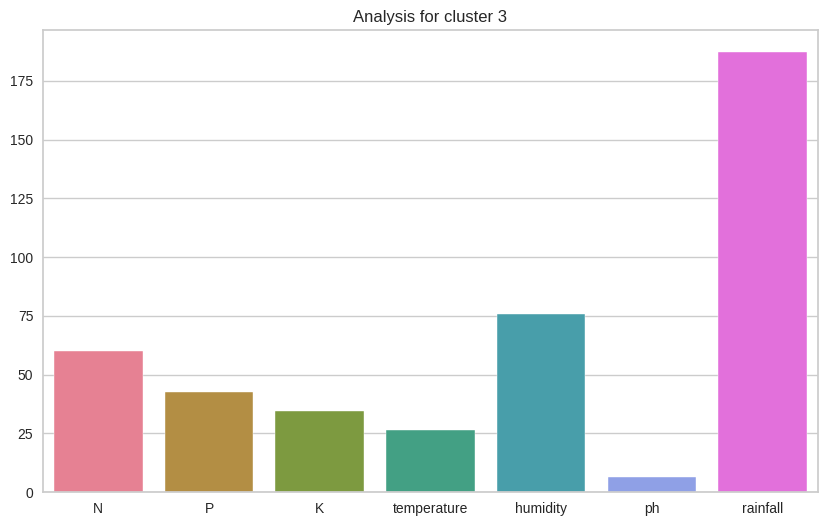

In [ ]:
cluster3_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==2]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster3_analysis[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

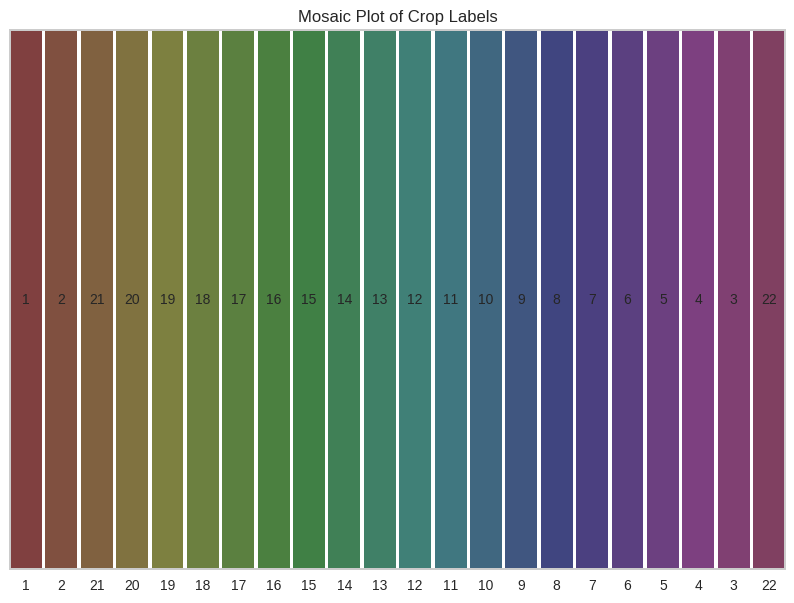

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
# Create a mosaic plot for the label column
fig, ax = plt.subplots(figsize=(10, 7))
mosaic(crop, ['crop_num'], ax=ax)
plt.title('Mosaic Plot of Crop Labels')
plt.show()

|--- rainfall <= 30.39
|   |--- class: 9
|--- rainfall >  30.39
|   |--- humidity <= 27.69
|   |   |--- K <= 50.00
|   |   |   |--- class: 20
|   |   |--- K >  50.00
|   |   |   |--- class: 21
|   |--- humidity >  27.69
|   |   |--- P <= 107.50
|   |   |   |--- humidity <= 70.81
|   |   |   |   |--- N <= 59.50
|   |   |   |   |   |--- rainfall <= 82.10
|   |   |   |   |   |   |--- humidity <= 60.02
|   |   |   |   |   |   |   |--- class: 18
|   |   |   |   |   |   |--- humidity >  60.02
|   |   |   |   |   |   |   |--- rainfall <= 57.68
|   |   |   |   |   |   |   |   |--- P <= 52.00
|   |   |   |   |   |   |   |   |   |--- class: 18
|   |   |   |   |   |   |   |   |--- P >  52.00
|   |   |   |   |   |   |   |   |   |--- temperature <= 30.17
|   |   |   |   |   |   |   |   |   |   |--- class: 15
|   |   |   |   |   |   |   |   |   |--- temperature >  30.17
|   |   |   |   |   |   |   |   |   |   |--- class: 18
|   |   |   |   |   |   |   |--- rainfall >  57.68
|   |   |   |   |   |   |

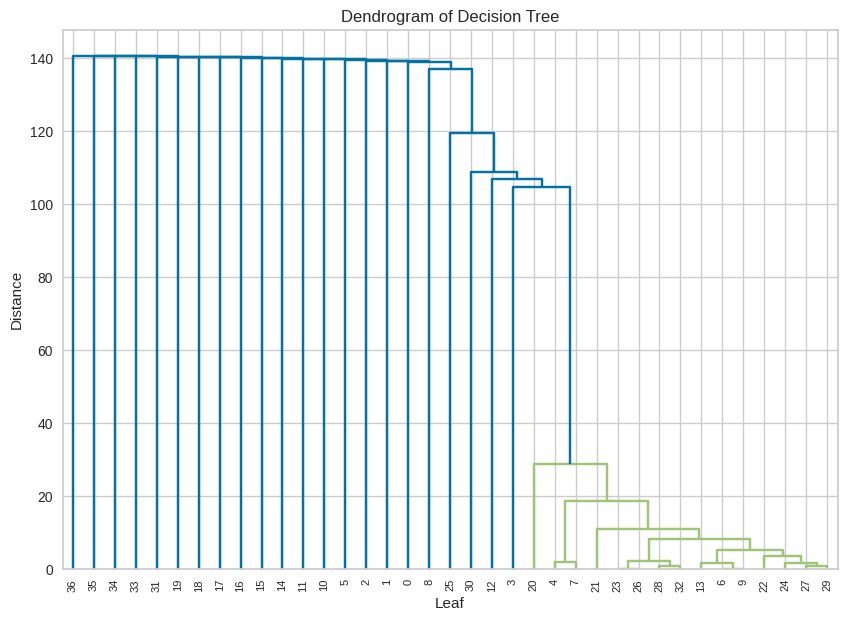

In [ ]:
# Creating a dendrogram
from sklearn.tree import DecisionTreeClassifier, export_text
from scipy.cluster.hierarchy import dendrogram, linkage

X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

leaf_values = clf.tree_.value[clf.tree_.children_left == -1][:, 0]
linkage_matrix = linkage(leaf_values, method='ward')

fig, ax = plt.subplots(figsize=(10, 7))
dendrogram(linkage_matrix, labels=range(len(leaf_values)), ax=ax, leaf_rotation=90)
plt.title('Dendrogram of Decision Tree')
plt.xlabel('Leaf')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
crop = pd.read_csv('Crop_recommendation.csv')

# Compute average values for each parameter grouped by the crop type
crop_statistics = crop.groupby('label').mean()


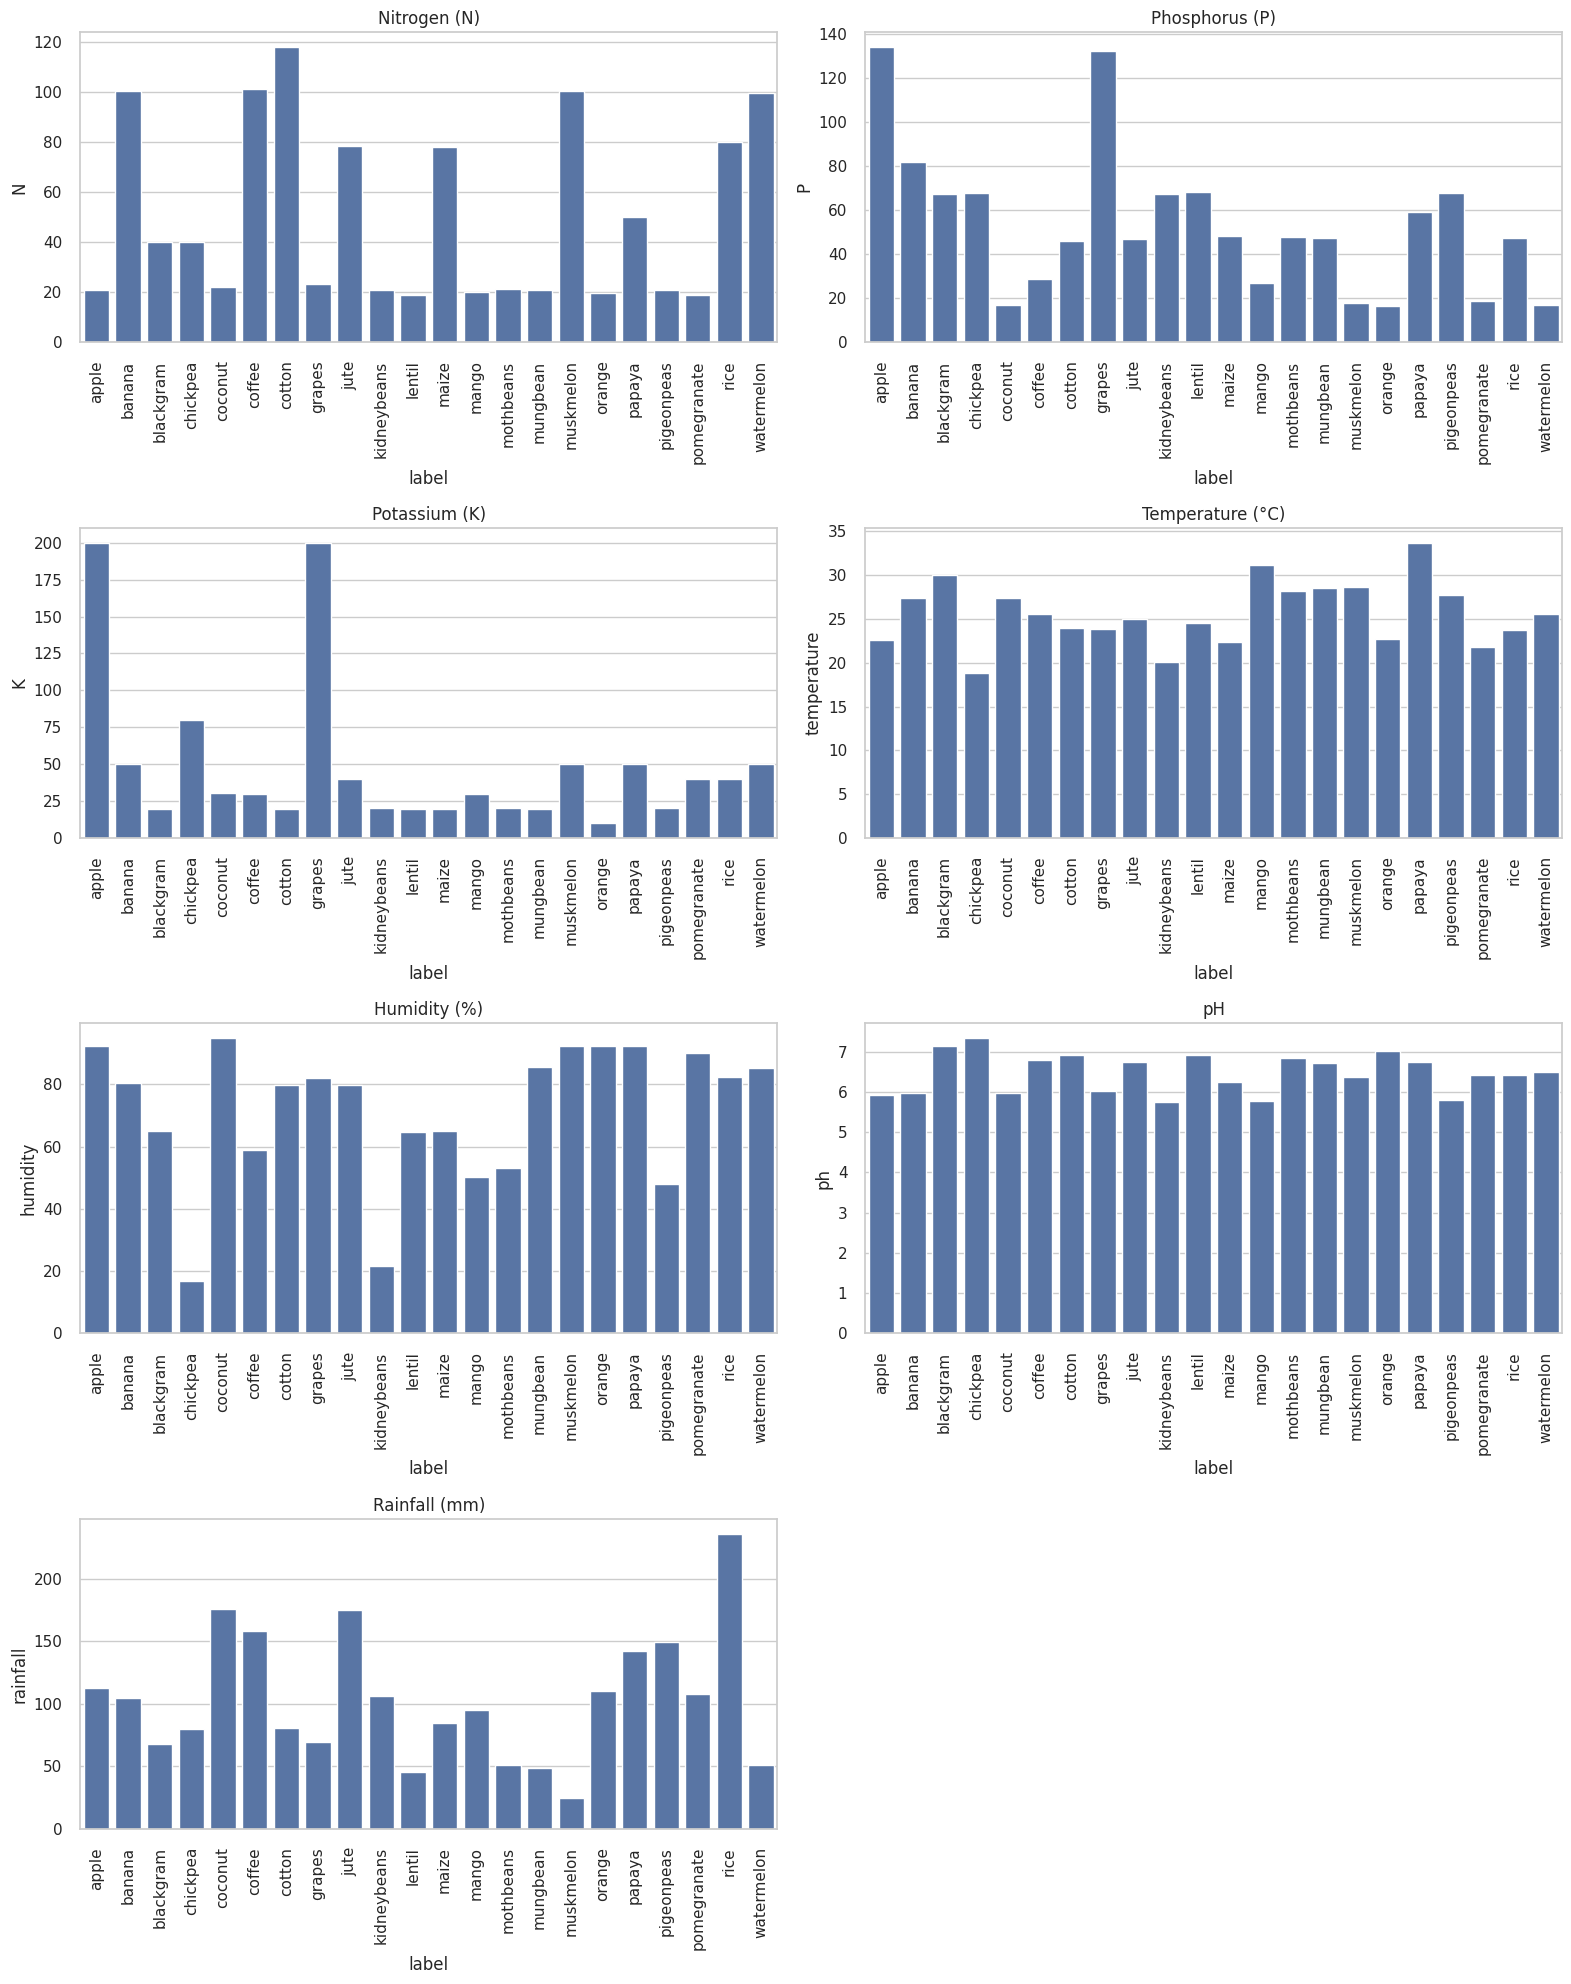

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis for each parameter
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# List of parameters to plot
parameters = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
titles = ['Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)',
          'Temperature (°C)', 'Humidity (%)', 'pH', 'Rainfall (mm)']

# Plot each parameter
for i, param in enumerate(parameters):
    ax = axes.flatten()[i]
    sns.barplot(x=crop_statistics.index, y=crop_statistics[param], ax=ax)
    ax.set_title(titles[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Hide the last subplot (since we have 7 parameters and 8 subplots)
fig.delaxes(axes[3][1])

# Show the plot
plt.show()
